# DCBC evaluation

In [4]:
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sys

base_dir = '/Volumes/diedrichsen_data$/data/FunctionalFusion'
if not Path(base_dir).exists():
    base_dir = '/srv/diedrichsen/data/FunctionalFusion'

This notebook plots the DCBC and cosine error evaluation of the different parcellations

## Evaluation on old parcellations

<AxesSubplot: xlabel='name', ylabel='dcbc'>

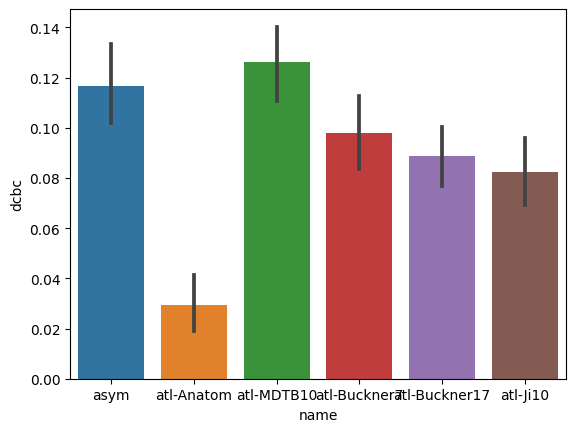

In [32]:
D=pd.read_csv(base_dir + '/Models/eval_dcbc_group.tsv',sep='\t')
D['name']=[s.split('_')[0] for s in D.model_name]
sb.barplot(data=D,x='name',y='dcbc')

In [5]:
D

,model_name,test_data,subj_num,dcbc,name
0,asym_Md_space-MNISymC3_K-10,Mdtb,0,0.101467,asym
1,asym_Md_space-MNISymC3_K-10,Mdtb,1,0.096007,asym
2,asym_Md_space-MNISymC3_K-10,Mdtb,2,0.051763,asym
3,asym_Md_space-MNISymC3_K-10,Mdtb,3,0.205131,asym
4,asym_Md_space-MNISymC3_K-10,Mdtb,4,0.101393,asym
...,...,...,...,...,...
139,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,19,0.086433,atl-Ji10
140,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,20,0.097446,atl-Ji10
141,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,21,0.073917,atl-Ji10
142,atl-Ji10_space-MNI152NLin2009cSymC_dseg,Mdtb,22,0.034162,atl-Ji10


## Evaluation on the new parcellations

In [87]:
# Load evaluation results
type = ['sym','asym']
K = [10,20,34]
D = pd.DataFrame()
for t in type:
    for k in K: 
        fname = base_dir + f'/Models/Evaluation_01/eval_dcbc_{t}_K-{k}.tsv'
        dcbc = pd.read_csv(fname, sep='\t')
        dcbc['type']=[t]*dcbc.shape[0]
        D=pd.concat([D,dcbc],ignore_index=True)
D

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dcbc_indiv,type
0,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,0,0.091854,0.111048,sym
1,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,1,0.095631,0.167012,sym
2,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,2,0.026171,0.048825,sym
3,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,3,0.209580,0.296363,sym
4,0,MNISymC3,10,['Mdtb'],1.115685e+07,Mdtb,half,1,4,0.134436,0.125377,sym
...,...,...,...,...,...,...,...,...,...,...,...,...
4195,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,7,0.021919,0.078985,asym
4196,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,8,0.026541,0.031448,asym
4197,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,9,0.036939,0.071233,asym
4198,6,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.483814e+08,Ibc,half,2,10,0.028013,0.057569,asym


### DCBC for group arrangement model: Train and test
Error bars indicate variation in DCBC across subjects (across all four models)

<AxesSubplot: xlabel='test_data', ylabel='dcbc_group'>

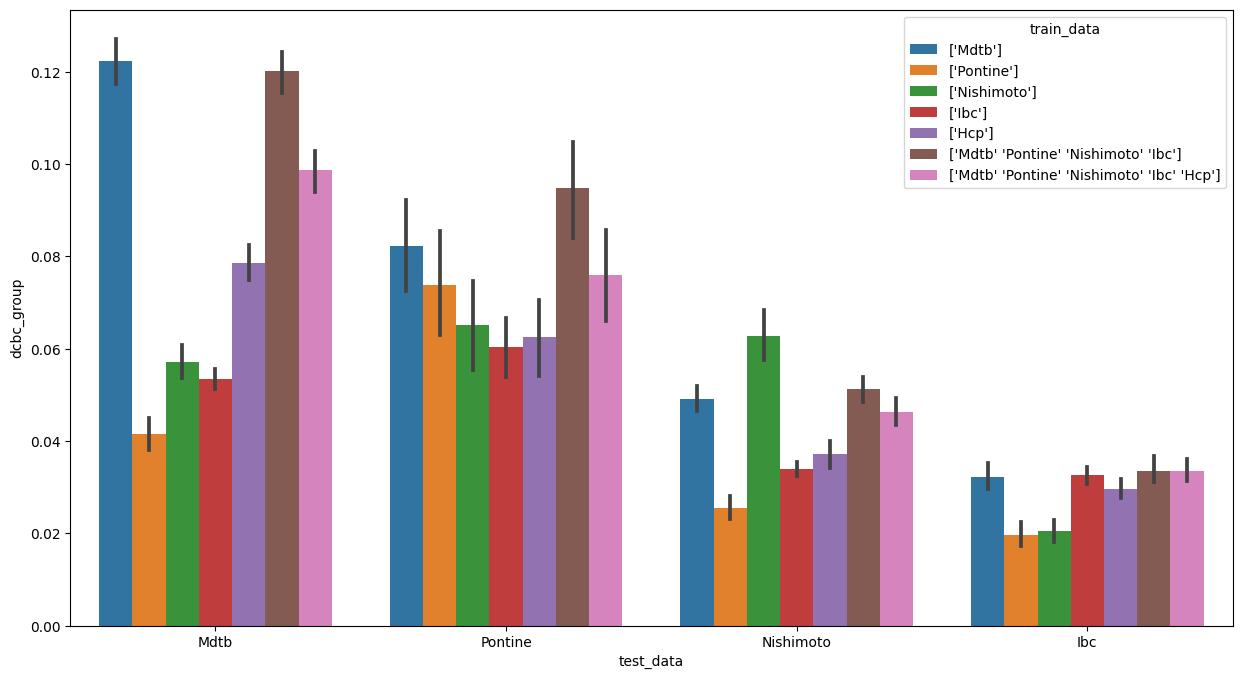

In [95]:
plt.figure(figsize=(15,8))

sb.barplot(data=D, x="test_data", y="dcbc_group", hue="train_data")
# sb.barplot(data=dcbc, x="train_data", y="dcbc", hue="test_data")

### Group DCBC as a function of K

<AxesSubplot: xlabel='K', ylabel='dcbc_group'>

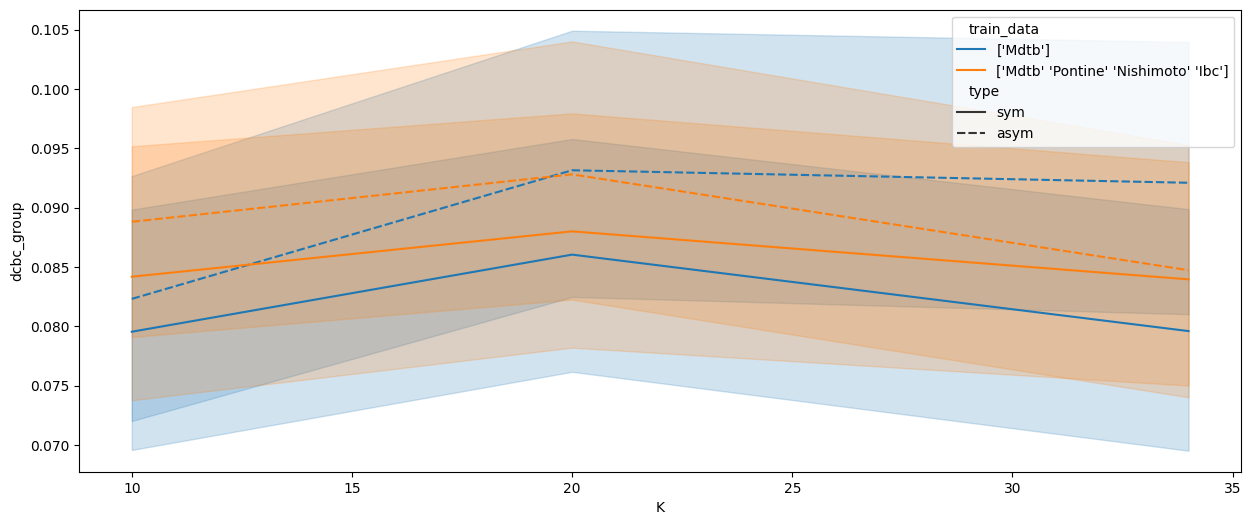

In [35]:

plt.figure(figsize=(15,6))
T= D[(D.train_data=="['Mdtb']") | \
     (D.train_data=="['Mdtb' 'Pontine' 'Nishimoto' 'Ibc']")]
sb.lineplot(data=T,x='K',hue='train_data',style='type',y='dcbc_group')

### DCBC for individual parcellations

<AxesSubplot: xlabel='test_data', ylabel='dcbc_indiv'>

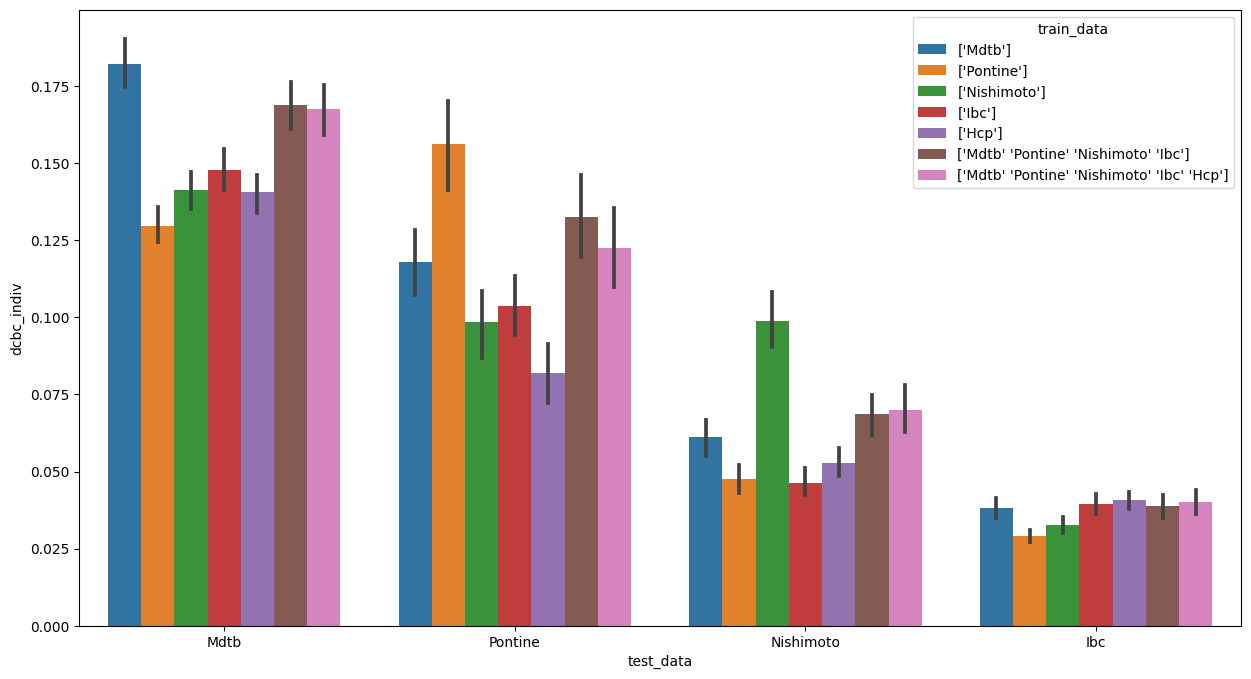

In [45]:
plt.figure(figsize=(15,8))

sb.barplot(data=D, x="test_data", y="dcbc_indiv", hue="train_data")
# sb.barplot(data=dcbc, x="train_data", y="dcbc")

### Compare results to DCBC for Model 04

In [101]:
# Load evaluation results
files = ['sym_K-34_HCPw_sym.tsv', 'sym_K-34_task_34.tsv', 'asym_K-34_HCPw_asym.tsv']

D4 = pd.DataFrame()
for file in files:
        fname = base_dir + '/Models/Evaluation_04/eval_dcbc_' + file
        dcbc = pd.read_csv(fname, sep='\t')
        dcbc['type']=[file.split('_K')[0]]*dcbc.shape[0]
        D4=pd.concat([D4,dcbc],ignore_index=True)
D4

,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dcbc_indiv,type
0,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,0,0.056463,0.093329,sym
1,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,1,0.039947,0.163373,sym
2,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,2,0.020854,0.065715,sym
3,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,3,0.138505,0.298063,sym
4,sym_MdPoNiIbHc_00,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.088253e+07,Mdtb,half,1,4,0.110229,0.031571,sym
...,...,...,...,...,...,...,...,...,...,...,...,...
1195,MdPoNiIbHc_10,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.239549e+07,Ibc,half,2,7,0.009156,0.075307,asym
1196,MdPoNiIbHc_10,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.239549e+07,Ibc,half,2,8,0.025776,0.031343,asym
1197,MdPoNiIbHc_10,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.239549e+07,Ibc,half,2,9,0.019681,0.066128,asym
1198,MdPoNiIbHc_10,MNISymC3,34,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],2.239549e+07,Ibc,half,2,10,0.010104,0.076329,asym


<AxesSubplot: xlabel='test_data', ylabel='dcbc_group'>

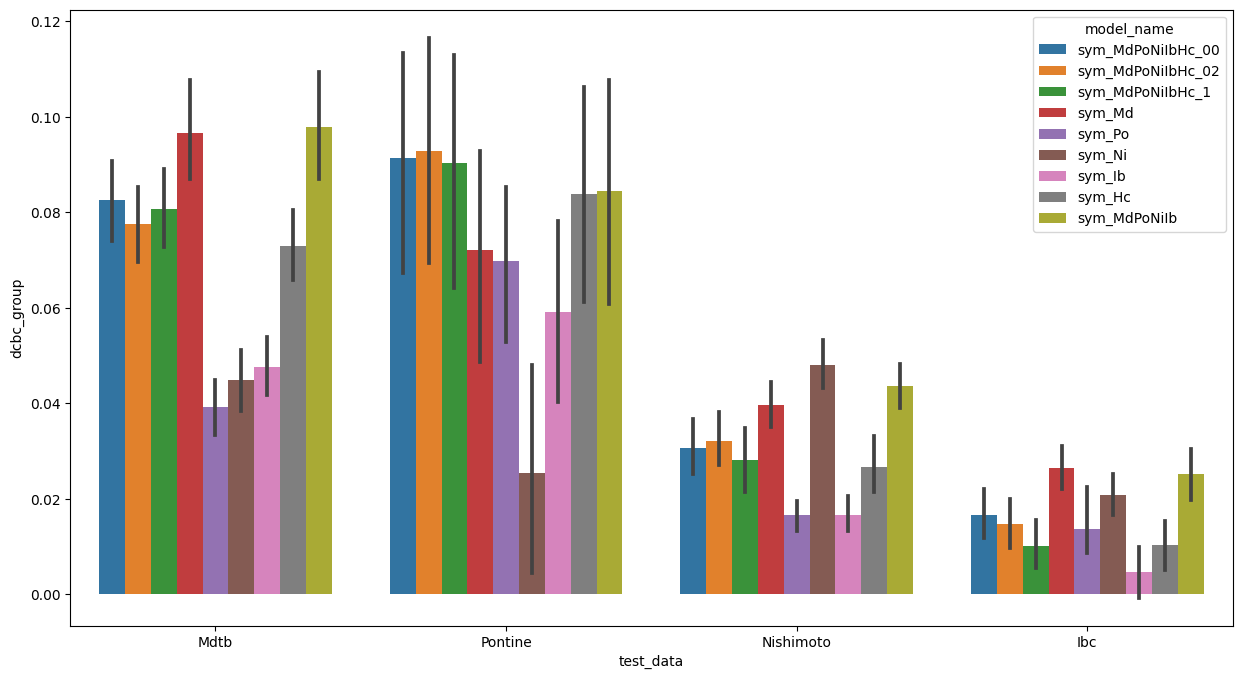

In [104]:
plt.figure(figsize=(15,8))

sb.barplot(data=D4.query('type == "sym"'), x="test_data", y="dcbc_group", hue="model_name")
# sb.barplot(data=D4, x="model_name", y="dcbc_group")

# Compare asymmetric and symmetric

<AxesSubplot: xlabel='test_data', ylabel='dcbc_group'>

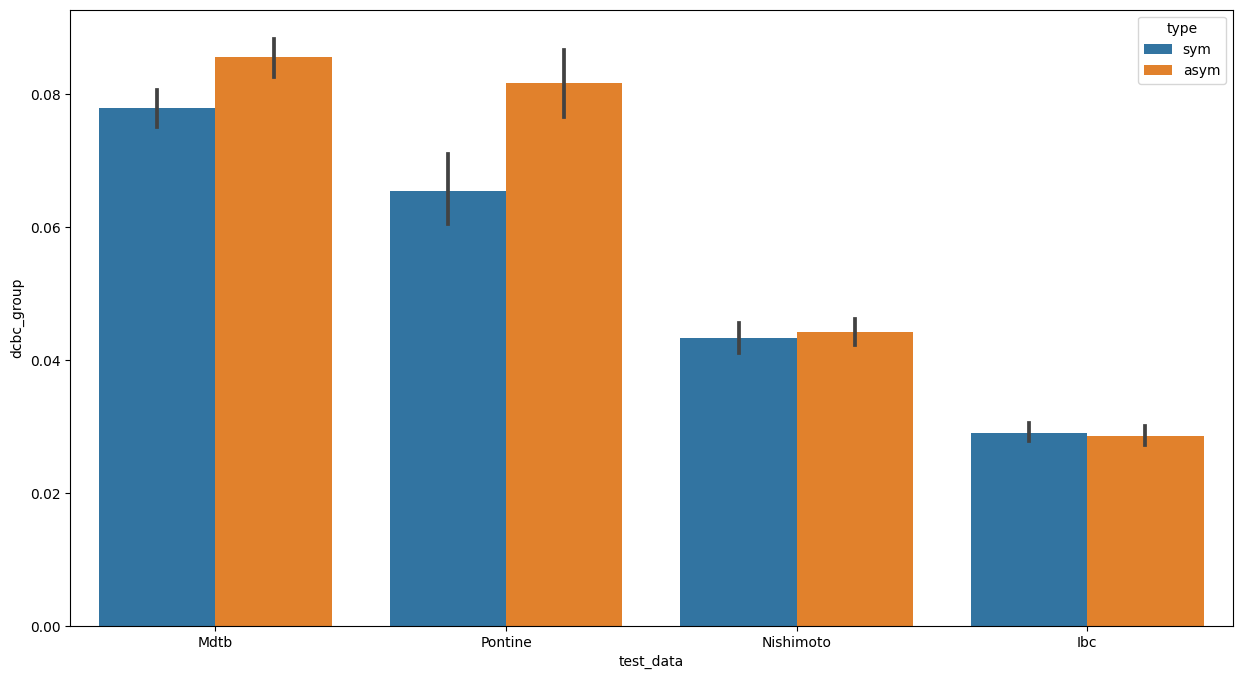

In [116]:
plt.figure(figsize=(15,8))

sb.barplot(data=D, x="test_data", y="dcbc_group", hue="type")

<AxesSubplot: xlabel='test_data', ylabel='dcbc_group'>

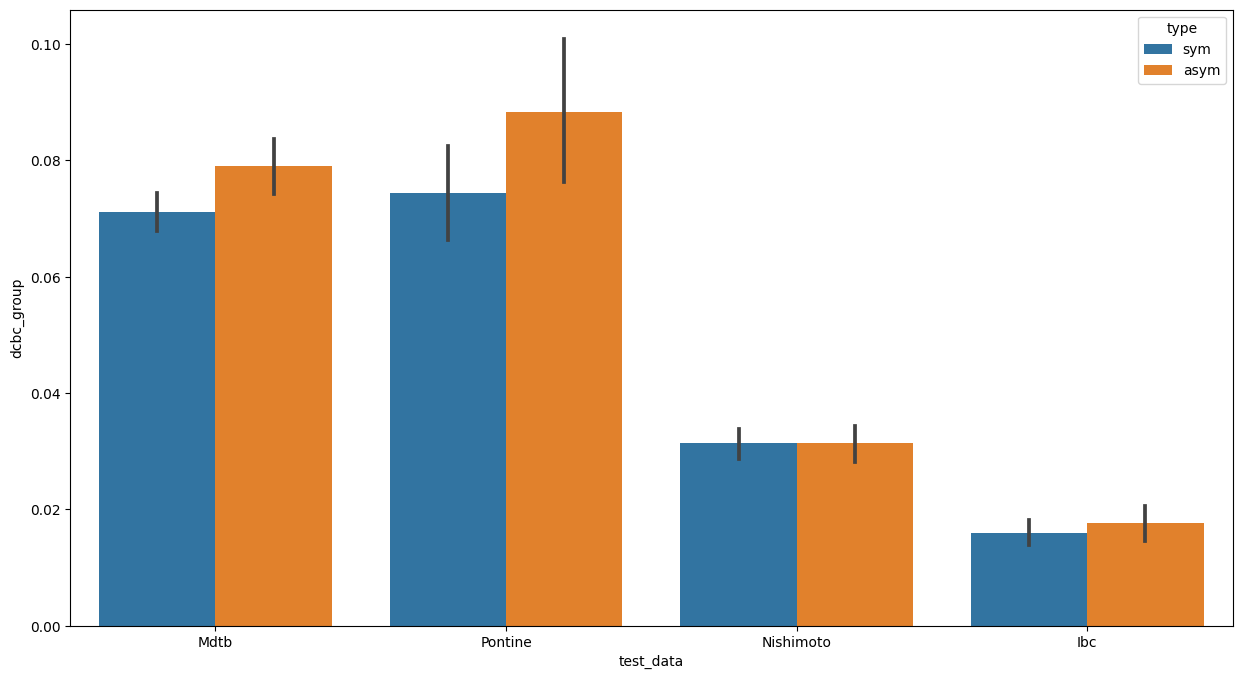

In [105]:

plt.figure(figsize=(15,8))

sb.barplot(data=D4, x="test_data", y="dcbc_group", hue="type")
# sb.barplot(data=D4, x="model_name", y="dcbc_group")

## Compare Group DCBC of model 04 (asymmetric) to Group DCBC of model 01 (first plot)

In [7]:
fname = base_dir + f'/Models/Evaluation_01/eval_dcbc_asym_K-10.tsv'
D = pd.read_csv(fname, sep='\t')
D


,model_name,atlas,K,train_data,train_loglik,test_data,indivtrain_ind,indivtrain_val,subj_num,dcbc_group,dcbc_indiv
0,9,MNISymC3,10,['Mdtb'],1.116812e+07,Mdtb,half,1,0,0.095702,0.136202
1,9,MNISymC3,10,['Mdtb'],1.116812e+07,Mdtb,half,1,1,0.076602,0.195868
2,9,MNISymC3,10,['Mdtb'],1.116812e+07,Mdtb,half,1,2,0.031185,0.059925
3,9,MNISymC3,10,['Mdtb'],1.116812e+07,Mdtb,half,1,3,0.199981,0.325801
4,9,MNISymC3,10,['Mdtb'],1.116812e+07,Mdtb,half,1,4,0.169028,0.180562
...,...,...,...,...,...,...,...,...,...,...,...
695,2,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.524013e+08,Ibc,half,2,7,0.031400,0.081056
696,2,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.524013e+08,Ibc,half,2,8,0.037203,0.016438
697,2,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.524013e+08,Ibc,half,2,9,0.040424,0.047399
698,2,MNISymC3,10,['Mdtb' 'Pontine' 'Nishimoto' 'Ibc' 'Hcp'],1.524013e+08,Ibc,half,2,10,0.046909,0.055077


<AxesSubplot:xlabel='train_data', ylabel='dcbc_indiv'>

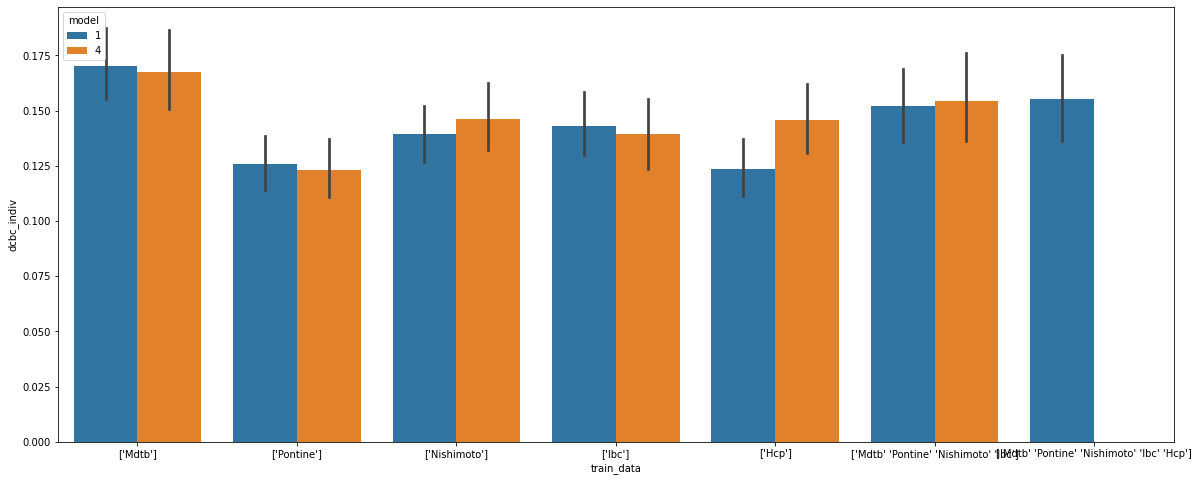

In [21]:
# Load evaluation results
fname = base_dir + f'/Models/Evaluation_01/eval_dcbc_sym_K-34.tsv'
D1 = pd.read_csv(fname, sep='\t')
fname = base_dir + f'/Models/Evaluation_04/eval_dcbc_sym_K-34_task.tsv'
D4 = pd.read_csv(fname, sep='\t')
D1['model']=[1]*D1.shape[0]
D4['model']=[4]*D4.shape[0]
D = pd.concat([D1,D4])

plt.figure(figsize=(20,8))
sb.barplot(data=D[D.test_data=='Mdtb'],x='train_data',y='dcbc_group',hue='model')
